# Insurance Fraud Detection : Exploratory df Analysis

---

## Loading Data

In [1]:
#loading the df set :

import pandas as pd
path = "/home/omkar/Omkar Pawar/Data Science/Projects/Insurance Fraud Detection/Data/insuranceFraud.csv"
df = pd.read_csv(path)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


----------

## Data Preprocessing:

In [5]:
# In this data set missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
import numpy as np
df=df.replace('?',np.nan)

In [6]:
# list of columns not necessary for prediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [7]:
# dropping the unnecessary columns
df.drop(columns=cols_to_drop,inplace=True)

In [8]:
# checking for missing values
df.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

### Dealing with `nan` values:

In [10]:
# df['collision_type'].replace(np.nan, df['collision_type'].mode, inplace = True)
# df['authorities_contacted'].replace(np.nan, df['authorities_contacted'].mode, inplace = True)
# df['property_damage'].replace(np.nan, df['property_damage'].mode, inplace = True)
# df['police_report_available'].replace(np.nan, df['police_report_available'].mode, inplace = True)

# df.head()  # RecursionError: maximum recursion depth exceeded while calling a Python object

There is some issue with above code. When I am trying to see df after applying above steps I am getting recursion error...???

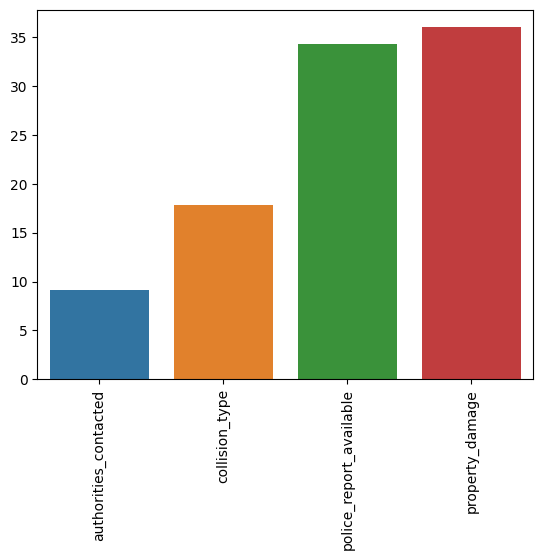

In [11]:
# To check/visualize nan values for EDA:
def percent_missing(df):
    percent_nan =  100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return(percent_nan)

percent_nan = percent_missing(df)

import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.show()

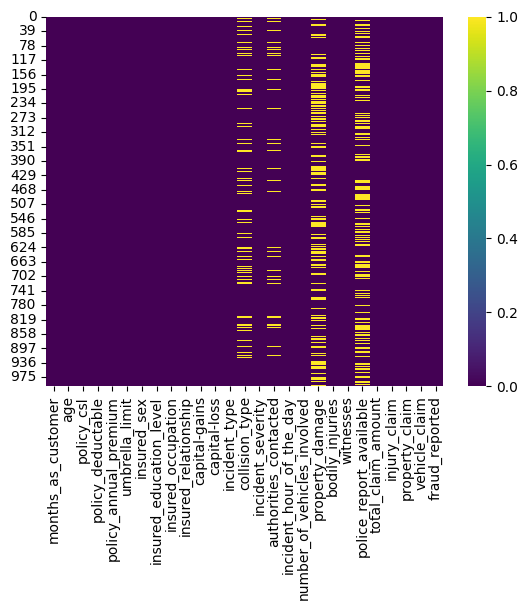

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.show()


In [13]:
x = df.size
print(x)

# df.dropna(inplace=True) # Dropping the NaN value can sometimes cause the loss of information along with it. 

y = df.size
print(y)

print(f"we are losing {x - y} records") # dropping nan values is not worth it ... we are losing too much df. 

27000
27000
we are losing 0 records


27000

9180

we are losing 17820 records if we droop nan values which is great loss of  information. 

------------

In [15]:
cat_df = df.select_dtypes(include=('object'))
num_df = df.select_dtypes(include=('number'))

In [16]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [17]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [18]:
# Get all the unique values from categorical features. 
for i in cat_df.columns:
    print(f"{i}: {cat_df[i].unique()}")
    print("------------------------------") 

policy_csl: ['250/500' '100/300' '500/1000']
------------------------------
insured_sex: ['MALE' 'FEMALE']
------------------------------
insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
------------------------------
insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
------------------------------
insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
------------------------------
incident_type: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
------------------------------
collision_type: ['Side Collision' nan 'Rear Collision' 'Front Collision']
------------------------------
incident_severity: ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
--------

In [19]:
features=['authorities_contacted','collision_type','police_report_available','property_damage','incident_type','incident_severity','total_claim_amount']

1. collision_type: ['Side Collision' nan 'Rear Collision' 'Front Collision']

If there is no collision happened in case of car then that value could have been left to be `nan`. This can be the case if car gets stolen. 

- `nan` can be replaced with 'No Collision'.

If incident type is `'Vehicle Theft'` then there will be collision then we can replace `nan` values with `No Collision. 

In [20]:
df.loc[(df['collision_type'].isnull()) & (df['incident_type']=='Vehicle Theft'),'collision_type']='NO Collision'

In [21]:
# If there is no collision happened at place of nan we will replace it with "No Collision"
df.loc[(df['collision_type'].isnull()), 'collision_type' ] = 'NO Collision'

2. authorities_contacted: ['Police' nan 'Fire' 'Other' 'Ambulance']

in this case there is chance that no authority has been contacted... 

- `nan` can be replaced with "No Authority Contacted"

In [22]:
df['authorities_contacted']=df['authorities_contacted'].fillna("No Authorities Contacted")

3. property_damage: ['YES' nan 'NO']
In this case of property damage `nan` value does not make any sense.

- is it better to drop it .... but again these are the features with most `nan` values 


In [23]:
df['property_damage']=df['property_damage'].fillna('NO')

4. police_report_available: ['YES' nan 'NO']:
- we will do same with police_report_available will replace nan with 'NO'

In [24]:
df['police_report_available']=df['police_report_available'].fillna('NO')

------------

In [25]:
# # save data to csv for further use:
# df.to_csv('../Data/cleaned_data_without_nan.csv')

-------------

In [8]:
import pandas as pd

In [9]:
path = "/home/omkar/Omkar Pawar/Data Science/Projects/Insurance Fraud Detection/Data/cleaned_data_without_nan.csv"
df = pd.read_csv(path)

In [10]:
df.head()

,Unnamed: 0,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [11]:
df.drop(labels=['Unnamed: 0'], axis=1, inplace= True)

In [12]:
df.isna().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [13]:
# separating numerical and categorical features:

cat_df = df.select_dtypes(include=('object'))
num_df = df.select_dtypes(include=('number'))

In [14]:
# Get all the unique values from categorical features. 
for i in cat_df.columns:
    print(f"{i}: {cat_df[i].unique()}")
    print("------------------------------") 

policy_csl: ['250/500' '100/300' '500/1000']
------------------------------
insured_sex: ['MALE' 'FEMALE']
------------------------------
insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
------------------------------
insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
------------------------------
insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
------------------------------
incident_type: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
------------------------------
collision_type: ['Side Collision' 'NO Collision' 'Rear Collision' 'Front Collision']
------------------------------
incident_severity: ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage

In [15]:
# custom mapping for ordinal encoding:
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})

# for binary features we will use label encoding:
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})


# Apply one-hot encoding for nominal features:
for col in cat_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

cat_df = cat_df.astype(int)

In [16]:
#show dataframe
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_NO Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_No Authorities Contacted,authorities_contacted_Other,authorities_contacted_Police
0,2,1,6,3,1,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,2,1,6,2,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,1,0,7,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2,0,7,3,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5,1,5,2,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [17]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)

In [30]:
final_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_NO Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_No Authorities Contacted,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,1,0,0,0,1,0,0,0,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,1,1,0,0,0,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,1,0,0,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,1,1,0,0,0,1,0,0


In [54]:
final_df.to_csv("final_df.csv")

In [5]:
import pandas as pd 
final_df = pd.read_csv("Data/final_df.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/final_df.csv'

In [39]:
# separating the feature and target columns
X=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [32]:
import matplotlib.pyplot as plt
%matplotlib  inline

(array([349.,   0., 351.,   0.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

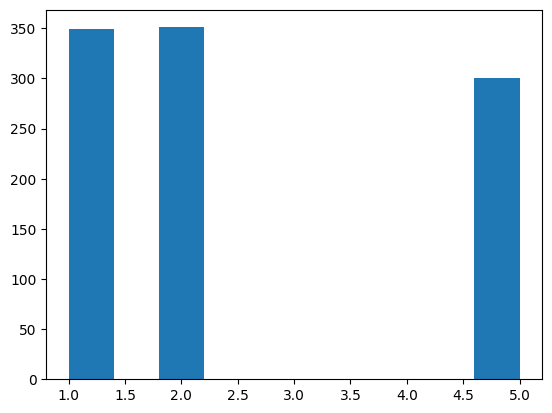

In [33]:
# we'll look at the distribution of data in some columns now
plt.hist(final_df['policy_csl'])

we  can see that for almost all categories of CSL the data is uniformly distributed

In [34]:
import seaborn as sns

/tmp/ipykernel_4849/3406173483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['insured_sex'])


<Axes: xlabel='insured_sex', ylabel='Density'>

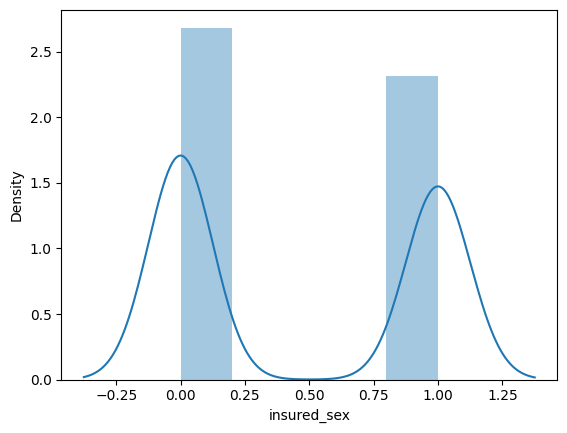

In [35]:
sns.distplot(final_df['insured_sex'])

we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

/tmp/ipykernel_4849/2012384692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['insured_education_level'])


<Axes: xlabel='insured_education_level', ylabel='Density'>

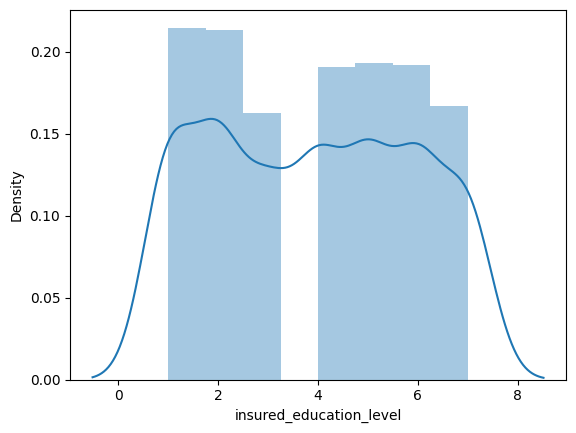

In [24]:
sns.distplot(final_df['insured_education_level'])

we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

/tmp/ipykernel_4849/1744967103.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['incident_severity'])


'\nWe can see that there are least claims for trivial incidents,\nmost claims for minor incidents,\nand for major and Total loss incidents the claims are almost equal.\n'

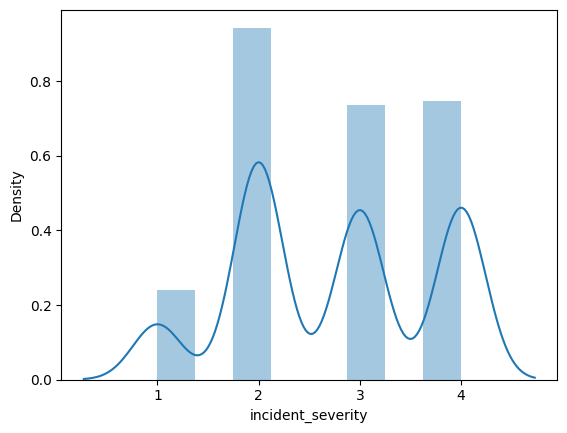

In [25]:
sns.distplot(final_df['incident_severity'])

We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.

<Axes: xlabel='months_as_customer', ylabel='age'>

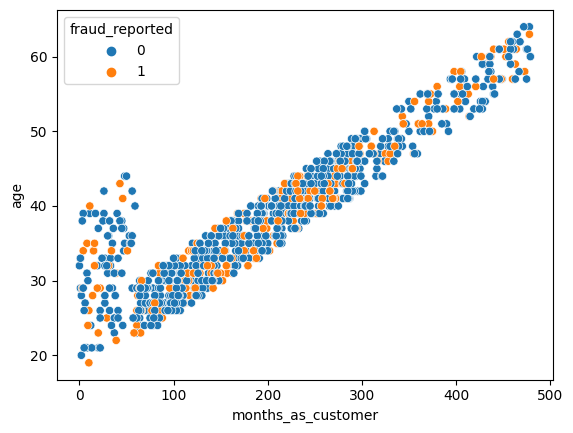

In [29]:
sns.scatterplot(x='months_as_customer', y='age', hue='fraud_reported', data=final_df)


from the graph it can be concluded that most of the fraud cases are done by the customers new 
to the company and that too comparatively younger ones.

<Axes: >

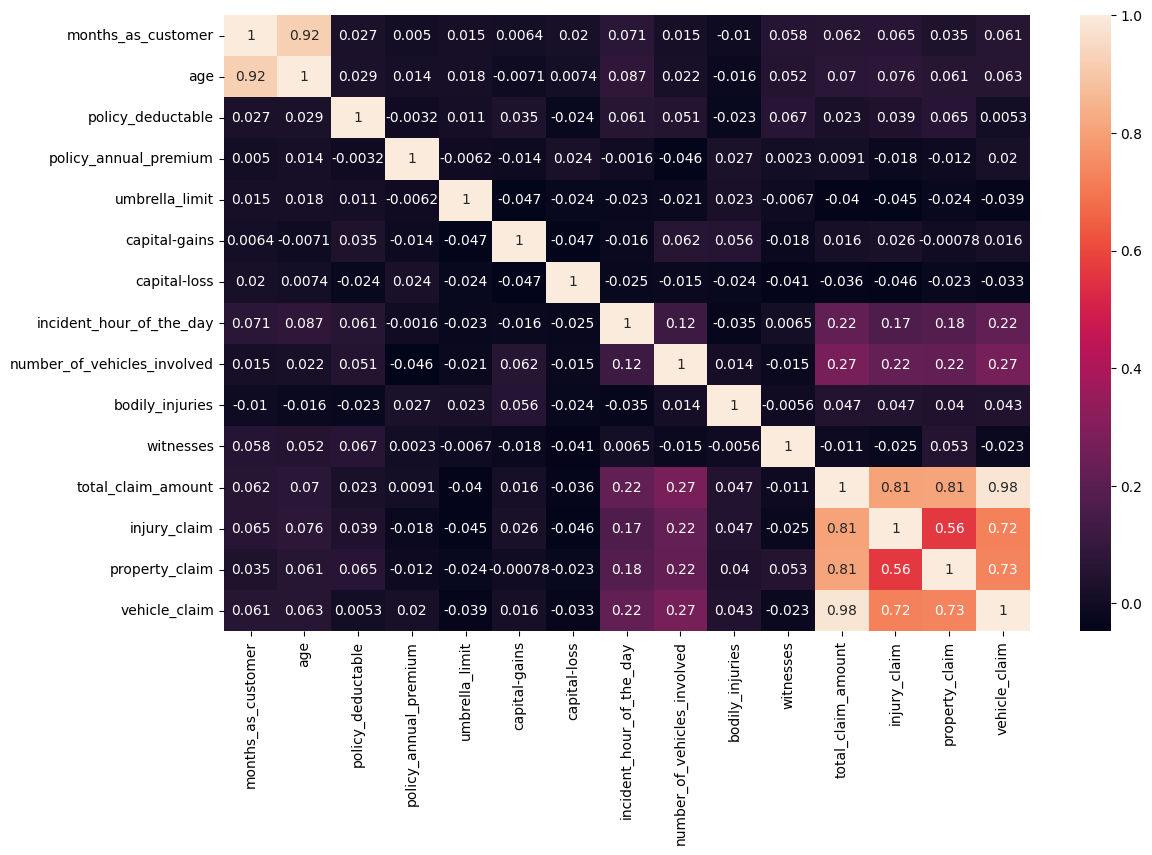

In [36]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.

Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [37]:
{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

SyntaxError: unterminated string literal (detected at line 1) (2977659319.py, line 1)

-----

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [40]:
# separating the feature and target columns
X=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [41]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

In [42]:
scaler.fit_transform(X)

array([[ 1.07813958,  0.99083647, -0.22238259, ..., -0.31640166,
        -0.49687301,  1.55713119],
       [ 0.2089946 ,  0.33407345,  1.41278352, ..., -0.31640166,
        -0.49687301,  1.55713119],
       [-0.60800168, -1.08891308,  1.41278352, ..., -0.31640166,
        -0.49687301,  1.55713119],
       ...,
       [-0.64276748, -0.54161057, -1.03996564, ..., -0.31640166,
        -0.49687301,  1.55713119],
       [ 2.20802805,  2.52328351,  1.41278352, ..., -0.31640166,
         2.01258666, -0.64220665],
       [ 2.19064515,  2.3043625 , -0.22238259, ..., -0.31640166,
        -0.49687301,  1.55713119]])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
from sklearn.svm import SVC
sv_classifier=SVC(C= 1, degree= 1, gamma= 'scale', kernel =  'rbf') # prameters got after grid search
y_pred = sv_classifier.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score
sc=accuracy_score(y_test,y_pred)
sc

0.725

In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
y_pred = xgb.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score
sc=accuracy_score(y_test,y_pred)
sc

0.73